In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 
Прямая задача:

$$
\begin{cases}
u_{tt} = u_{xx} - q(x)(u - v) - r(x)(u - \bar u), 
& x > 0,\ t > 0,
\\
v_{tt} = v_{xx} - q(x)(v - u), 
& x > 0,\ t > 0,
%\  q \geqslant 0,\ q \in C[0, \infty],
\\
\bar u_{tt} = \bar u_{xx} - q(x)(\bar u - \bar v) - r(x)(\bar u - u),
& x > 0,\ t > 0,
\\
\bar v_{tt} = \bar v_{xx} - q(x)(\bar v - \bar u), 
& x > 0,\ t > 0,
%\  q \geqslant 0,\ q \in C[0, \infty],
\\
u(x,~0) = v(x,~0) = \bar u(x,~0) = \bar v(x,~0) = 0, & x \geqslant 0,
\\
u_t(x,~0) = v_t(x,~0) = \bar u_t(x,~0) = \bar v_t(x,~0) = 0, & x \geqslant 0,
\\
u_x(0,~t) = -\delta (t), \ v_x(0,~t) = 0, & t \geqslant 0.
\\
\bar u_x(0,~t) = 0, \ \bar v_x(0,~t) = 0, & t \geqslant 0.
\end{cases}
$$

Даны функции $q(x)$ и $r(x)$.

Найти: $u(x,~t), v(x,~t), \bar u(x,~t), \bar v(x,~t)$.}


$$
\begin{cases}
u_t + u_x = f(x,~t), \\
f_t - f_x = -q(x)(u - v) - r(x)(u - \bar u), \\
v_t + v_x = g(x, ~t), \\
g_t - g_x = -q(x)(v - u), \\
\bar u_t + \bar u_x = h(x,~t), \\
h_t - h_x = -q(x)(\bar u - \bar v) - r(x)(\bar u - u), \\
\bar v_t + \bar v_x = d(x, ~t), \\
d_t - d_x = -q(x)(\bar v - \bar u). \\
\end{cases}
$$

$$
\begin{cases}
U_{n + 1}^{j + 1} - U_{n}^{j} = hW_{n}^{j}, \\
W_{n}^{j + 1} - W_{n + 1}^{j} = -hq_{n+1}(U_{n + 1}^{j}  - W_{n + 1}^{j}), \\
U_{0}^{j + 2} = U_{0}^{j} + 2hW_{0}^{j}.
\end{cases}
$$

In [2]:
def chess_template(N, h, Q, R) :
    if N % 2 != 0:
        print("excess layer")
        return None
    U1 = np.zeros((2*N, N), dtype=np.float)
    V1 = np.zeros((2*N, N), dtype=np.float)
    P1 = np.zeros((2*N, N), dtype=np.float) # P for U
    R1 = np.zeros((2*N, N), dtype=np.float) # R for V   
    U2 = np.zeros((2*N, N), dtype=np.float)
    V2 = np.zeros((2*N, N), dtype=np.float)
    P2 = np.zeros((2*N, N), dtype=np.float)
    R2 = np.zeros((2*N, N), dtype=np.float)
    U1[0, 0] = 1
    U1[1, 1] = 1
    for i in range(2, N) :
        U1[i, i] = 1.0
        for j in range(0 + i%2, i, 2) :
            if j == 0 :
                U1[i, 0] = U1[i-2, 0] + 2 * h * P1[i-2, 0]
                V1[i, 0] = V1[i-2, 0] + 2 * h * R1[i-2, 0]
                ####
                U2[i, 0] = U2[i-2, 0] + 2 * h * P2[i-2, 0]
                V2[i, 0] = V2[i-2, 0] + 2 * h * R2[i-2, 0]
            else :
                U1[i, j] = U1[i-1, j-1] + h * P1[i-1, j-1]
                V1[i, j] = V1[i-1, j-1] + h * R1[i-1, j-1]
                ####
                U2[i, j] = U2[i-1, j-1] + h * P2[i-1, j-1]
                V2[i, j] = V2[i-1, j-1] + h * R2[i-1, j-1]
            P1[i, j] = P1[i-1, j+1] - h * Q[j+1] * (U1[i-1, j+1] - V1[i-1, j+1]) - h*R[j+1]*(U1[i-1, j+1] - U2[i-1, j+1])
            R1[i, j] = R1[i-1, j+1] - h * Q[j+1] * (V1[i-1, j+1] - U1[i-1, j+1])
            ####
            P2[i, j] = P2[i-1, j+1] - h * Q[j+1] * (U2[i-1, j+1] - V2[i-1, j+1]) - h*R[j+1]*(U2[i-1, j+1] - U1[i-1, j+1])
            R2[i, j] = R2[i-1, j+1] - h * Q[j+1] * (V2[i-1, j+1] - U2[i-1, j+1])
    for i in range(N, 2*N) :
        for j in range(0 + i%2, 2*N - i, 2) :
            if j == 0 :
                U1[i, 0] = U1[i-2, 0] + 2 * h * P1[i-2, 0]
                V1[i, 0] = V1[i-2, 0] + 2 * h * R1[i-2, 0]
                ####
                U2[i, 0] = U2[i-2, 0] + 2 * h * P2[i-2, 0]
                V2[i, 0] = V2[i-2, 0] + 2 * h * R2[i-2, 0]
            else :
                U1[i, j] = U1[i-1, j-1] + h * P1[i-1, j-1]
                V1[i, j] = V1[i-1, j-1] + h * R1[i-1, j-1]
                ####
                U2[i, j] = U2[i-1, j-1] + h * P2[i-1, j-1]
                V2[i, j] = V2[i-1, j-1] + h * R2[i-1, j-1]
            P1[i, j] = P1[i-1, j+1] - h * Q[j+1] * (U1[i-1, j+1] - V1[i-1, j+1]) - h*R[j+1]*(U1[i-1, j+1] - U2[i-1, j+1])
            R1[i, j] = R1[i-1, j+1] - h * Q[j+1] * (V1[i-1, j+1] - U1[i-1, j+1])
            ####
            P2[i, j] = P2[i-1, j+1] - h * Q[j+1] * (U2[i-1, j+1] - V2[i-1, j+1]) - h*R[j+1]*(U2[i-1, j+1] - U1[i-1, j+1])
            R2[i, j] = R2[i-1, j+1] - h * Q[j+1] * (V2[i-1, j+1] - U2[i-1, j+1])
    return U1, V1, P1, R1, U2, V2, P2, R2


# Problem 1

In [3]:
def show_q_and_r(Q, R):
    fg = plt.figure(figsize=(7, 3), constrained_layout=True)
    gs = fg.add_gridspec(ncols=1, nrows=2)
    fig_ax_1 = fg.add_subplot(gs[0, :])
    fig_ax_1.set_title('q(x)')
    fig_ax_2 = fg.add_subplot(gs[1, :])
    fig_ax_2.set_title('r(x)')
    fig_ax_1.plot(Q, color='red')
    fig_ax_2.plot(R, color='red')
    plt.show()
    return None

In [4]:
def get_solve_images(N, h, Q, R):
    U1, V1, F, G, U2, V2, H, D = chess_template(N, h, Q, R)
    for i in range(0, N):
        for j in range(int(i%2), 2*N -2, 2):
            U1[j+1, i] = U1[j, i]
            V1[j+1, i] = V1[j, i]
            U2[j+1, i] = U2[j, i]
            V2[j+1, i] = V2[j, i]
            F[j+1, i] = F[j, i]
            G[j+1, i] = G[j, i]
            H[j+1, i] = H[j, i]
            D[j+1, i] = D[j, i]
    return U1, V1, F, G, U2, V2, H, D

In [5]:
def show_traces_waves(RES):
    fg = plt.figure(figsize=(12, 4), constrained_layout=True)
    gs = fg.add_gridspec(ncols=2, nrows=2)

    fig_ax_1 = fg.add_subplot(gs[0, 0])
    fig_ax_1.set_title('trace u')
    fig_ax_2 = fg.add_subplot(gs[1, 0])
    fig_ax_2.set_title('trace v')
    fig_ax_3 = fg.add_subplot(gs[0, 1])
    fig_ax_3.set_title(r'trace $\bar{u}$')
    fig_ax_4 = fg.add_subplot(gs[1, 1])
    fig_ax_4.set_title(r'trace $\bar{v}$')

    fig_ax_1.plot(RES[0][::2,0], color='red')
    fig_ax_2.plot(RES[1][::2,0], color='red')
    fig_ax_3.plot(RES[4][::2,0], color='red')
    fig_ax_4.plot(RES[5][::2,0], color='red')
    plt.show()
    return None

In [6]:
def show_traces_invariants(RES):
    fg = plt.figure(figsize=(12, 4), constrained_layout=True)
    gs = fg.add_gridspec(ncols=2, nrows=2)

    fig_ax_1 = fg.add_subplot(gs[0, 0])
    fig_ax_1.set_title('trace f')
    fig_ax_2 = fg.add_subplot(gs[1, 0])
    fig_ax_2.set_title('trace g')
    fig_ax_3 = fg.add_subplot(gs[0, 1])
    fig_ax_3.set_title('trace h')
    fig_ax_4 = fg.add_subplot(gs[1, 1])
    fig_ax_4.set_title('trace d')

    fig_ax_1.plot(RES[2][::2,0], color='red')
    fig_ax_2.plot(RES[3][::2,0], color='red')
    fig_ax_3.plot(RES[6][::2,0], color='red')
    fig_ax_4.plot(RES[7][::2,0], color='red')
    plt.show()
    return None

In [7]:
def show_sum_of_traces(RES):
    fg = plt.figure(figsize=(7, 3), constrained_layout=True)
    gs = fg.add_gridspec(ncols=1, nrows=2)
    fig_ax_1 = fg.add_subplot(gs[0, :])
    fig_ax_1.set_title(r'u + v + $\bar{u}$ + $\bar{v}$')
    fig_ax_2 = fg.add_subplot(gs[1, :])
    fig_ax_2.set_title('f + g + h + d')
    fig_ax_1.plot(RES[4][::2,0] + RES[5][::2,0] + RES[0][::2,0] + RES[1][::2,0], color='red')
    fig_ax_2.plot(RES[6][::2,0] + RES[7][::2,0] + RES[2][::2,0] + RES[3][::2,0], color='red')
    fig_ax_2.set_ylim(ymax=1.1, ymin=-1.1)
    plt.show()
    return None

In [8]:
def show_dir_problem_solve(RES):
    U1, V1, F, G, U2, V2, H, D = RES
    fg = plt.figure(figsize=(7, 6), constrained_layout=True, dpi=120)
    gs = fg.add_gridspec(ncols=4, nrows=2)
    fig_ax_1 = fg.add_subplot(gs[0,0])
    fig_ax_1.set_title('u')
    fig_ax_2 = fg.add_subplot(gs[0,1])
    fig_ax_2.set_title('v')
    fig_ax_3 = fg.add_subplot(gs[1,0])
    fig_ax_3.set_title('f')
    fig_ax_4 = fg.add_subplot(gs[1,1])
    fig_ax_4.set_title('g')
    fig_ax_5 = fg.add_subplot(gs[0,2])
    fig_ax_5.set_title(r'$\bar{u}$')
    fig_ax_6 = fg.add_subplot(gs[0,3])
    fig_ax_6.set_title(r'$\bar{v}$')
    fig_ax_7 = fg.add_subplot(gs[1,2])
    fig_ax_7.set_title('h')
    fig_ax_8 = fg.add_subplot(gs[1,3])
    fig_ax_8.set_title('d')
    im1 = fig_ax_1.imshow(np.flip(U1, axis=0), cmap='gist_rainbow', vmin=-1.0, vmax=1.0)
    #im1 = fig_ax_1.imshow(np.flip(U1, axis=0)+np.flip(V1, axis=0)+np.flip(U2, axis=0)+np.flip(V2, axis=0), 
    #                      cmap='gist_rainbow', vmin=-1.0, vmax=1.0)
    im2 = fig_ax_2.imshow(np.flip(V1, axis=0), cmap='gist_rainbow', vmin=-1.0, vmax=1.0)
    im3 = fig_ax_3.imshow(np.flip(F, axis=0), cmap='gist_rainbow', vmin=-1.0, vmax=1.0)
    im4 = fig_ax_4.imshow(np.flip(G, axis=0), cmap='gist_rainbow', vmin=-1.0, vmax=1.0)
    im5 = fig_ax_5.imshow(np.flip(U2, axis=0), cmap='gist_rainbow', vmin=-1.0, vmax=1.0)
    im6 = fig_ax_6.imshow(np.flip(V2, axis=0), cmap='gist_rainbow', vmin=-1.0, vmax=1.0)
    im7 = fig_ax_7.imshow(np.flip(H, axis=0), cmap='gist_rainbow', vmin=-1.0, vmax=1.0)
    im8 = fig_ax_8.imshow(np.flip(D, axis=0), cmap='gist_rainbow', vmin=-1.0, vmax=1.0)
    from matplotlib.cm import ScalarMappable
    from matplotlib.colors import Normalize
    fg.colorbar(ScalarMappable(cmap='gist_rainbow', norm=Normalize(vmin=-1.0, vmax=1.0)), 
                ax=[fig_ax_1, fig_ax_2, fig_ax_3, fig_ax_4, fig_ax_5, fig_ax_6, fig_ax_7, fig_ax_8])
    fig_ax_1.set(xticks=[], yticks=[])
    fig_ax_2.set(xticks=[], yticks=[])
    fig_ax_3.set(xticks=[], yticks=[])
    fig_ax_4.set(xticks=[], yticks=[])
    fig_ax_5.set(xticks=[], yticks=[])
    fig_ax_6.set(xticks=[], yticks=[])
    fig_ax_7.set(xticks=[], yticks=[])
    fig_ax_8.set(xticks=[], yticks=[])
    return None

In [9]:
def solve_dir_problem(N, h, Q, R):
    show_q_and_r(Q, R)
    res = get_solve_images(N, h, Q, R)
    show_dir_problem_solve(res)
    show_traces_waves(res)
    show_traces_invariants(res)
    show_sum_of_traces(res)
    return res

In [10]:
max_resistance_value = 0.05

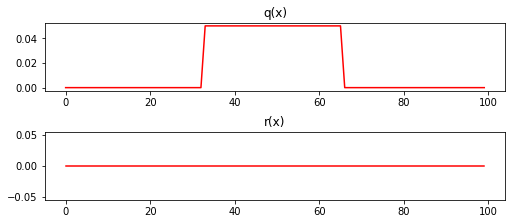

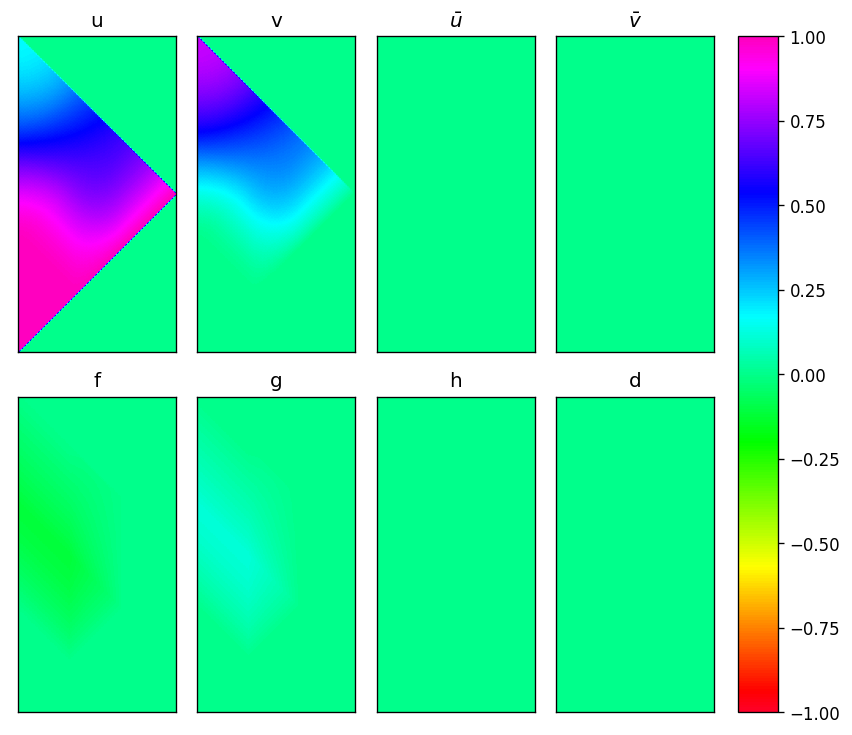

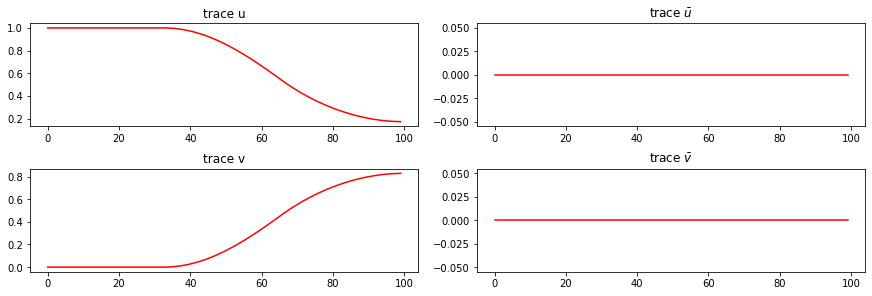

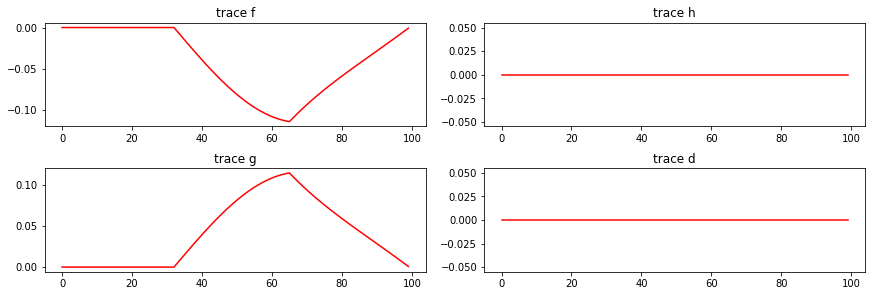

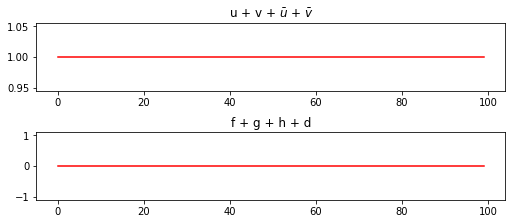

In [11]:
N, h = 100, 0.1
q, r = np.zeros(N), np.zeros(N)
for i in range(N//3, 2*N//3):
    q[i] = max_resistance_value
for i in range(N//3, 2*N//3):
    r[i] = 0.0
res  = solve_dir_problem(N, h, q, r)

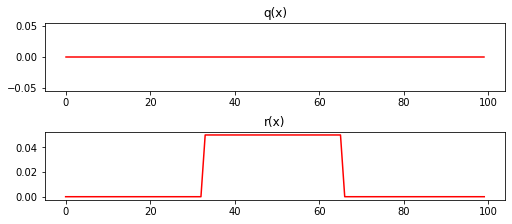

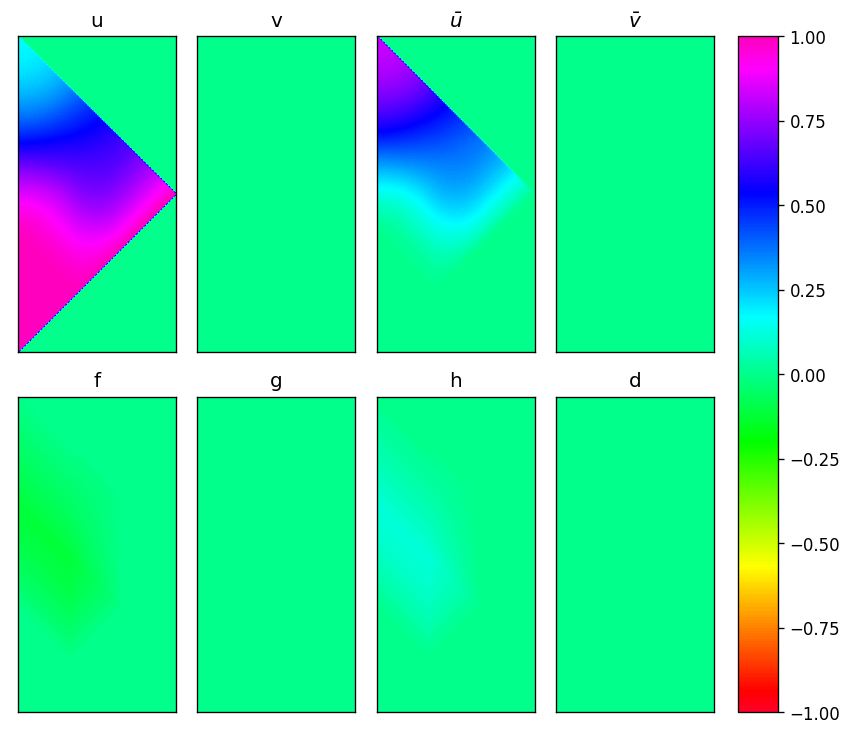

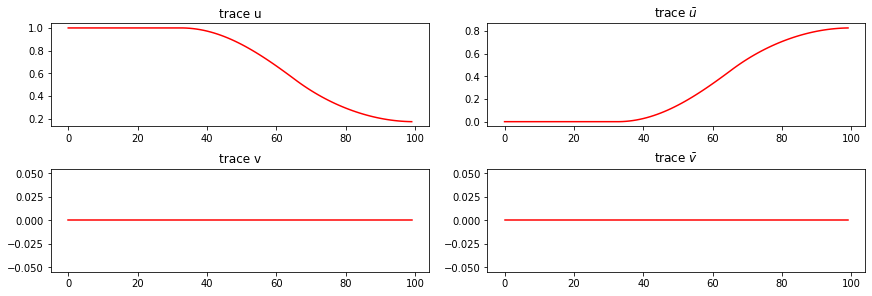

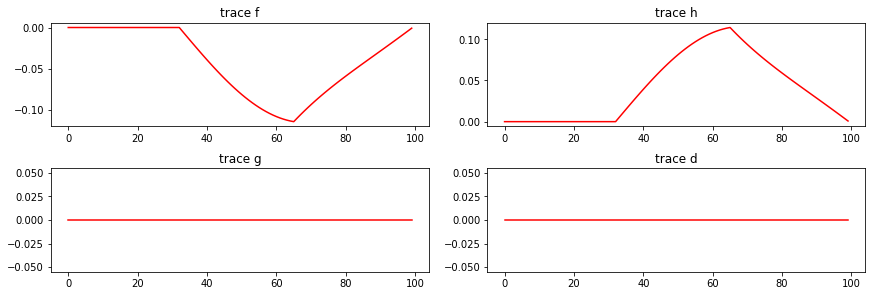

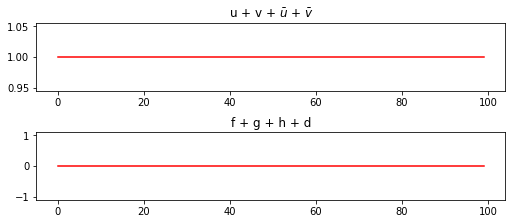

In [12]:
N, h = 100, 0.1
q, r = np.zeros(N), np.zeros(N)
for i in range(N//3, 2*N//3):
    q[i] = 0.0
for i in range(N//3, 2*N//3):
    r[i] = max_resistance_value
res  = solve_dir_problem(N, h, q, r)

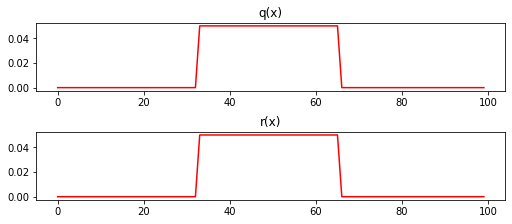

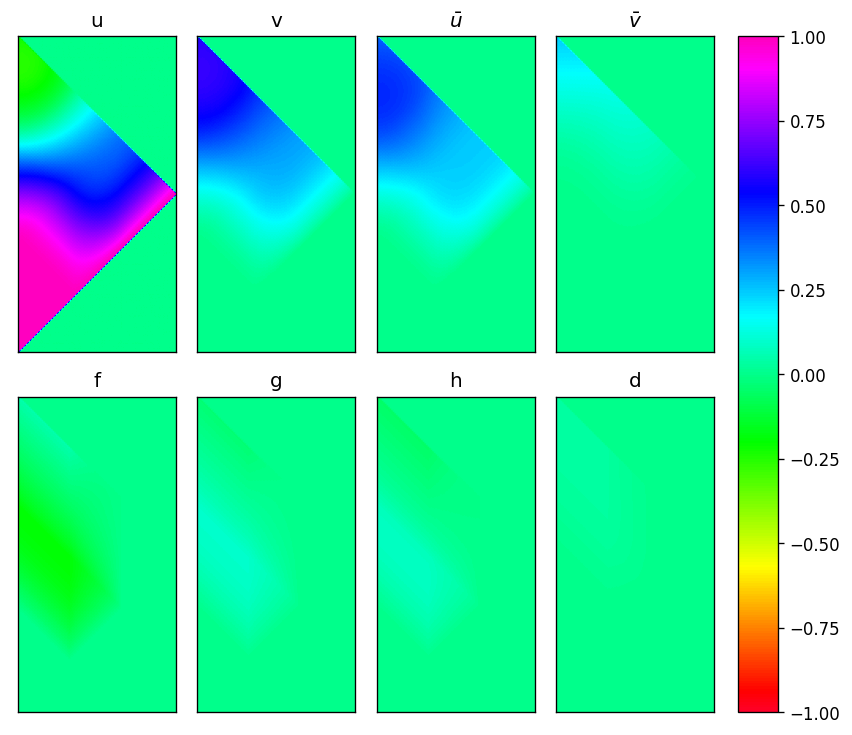

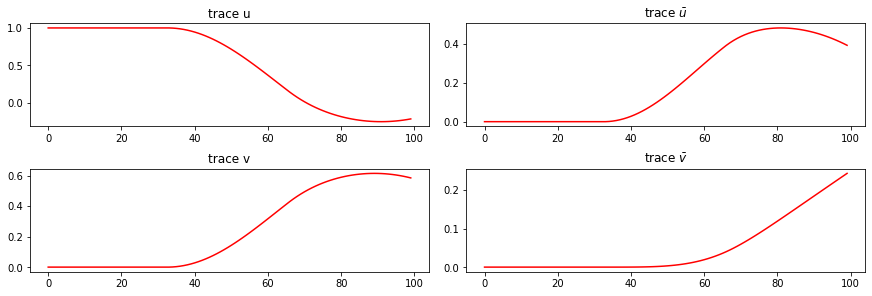

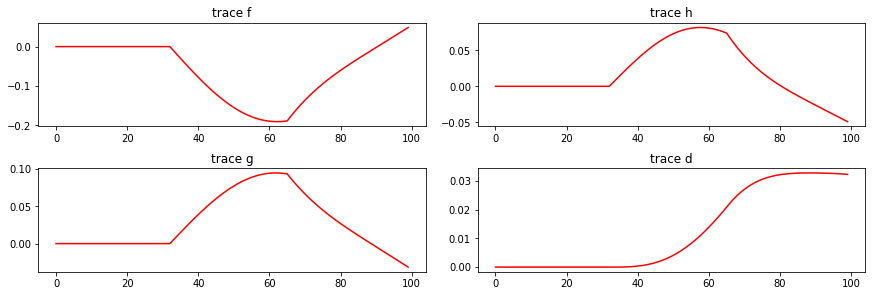

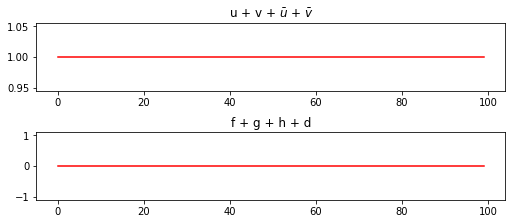

In [13]:
N, h = 100, 0.1
q, r = np.zeros(N), np.zeros(N)
for i in range(N//3, 2*N//3):
    q[i] = max_resistance_value
for i in range(N//3, 2*N//3):
    r[i] = max_resistance_value
res  = solve_dir_problem(N, h, q, r)

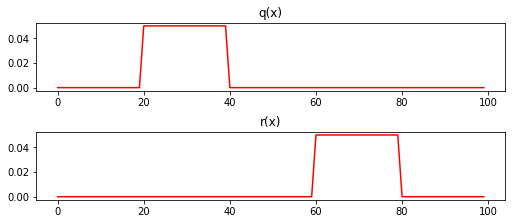

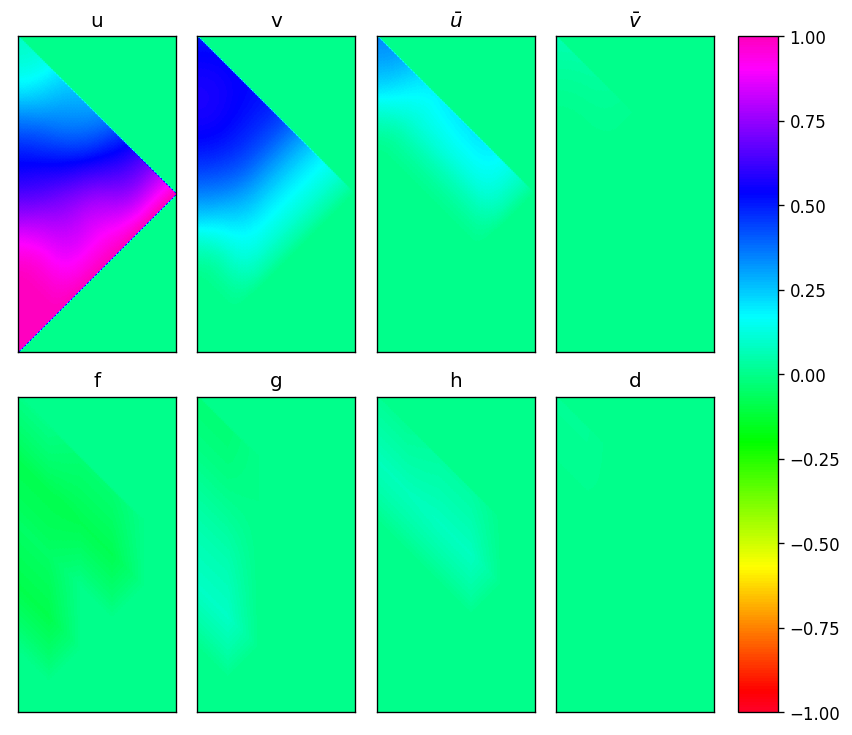

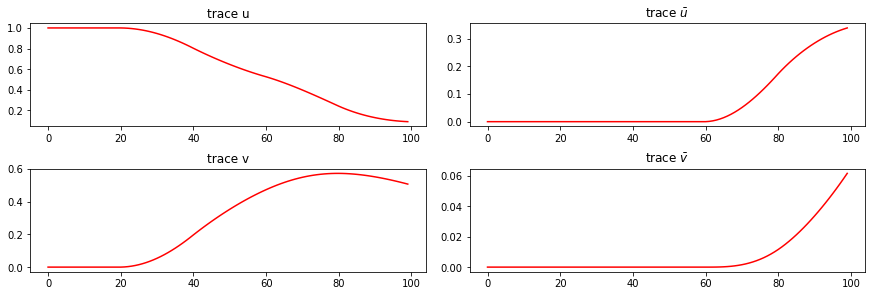

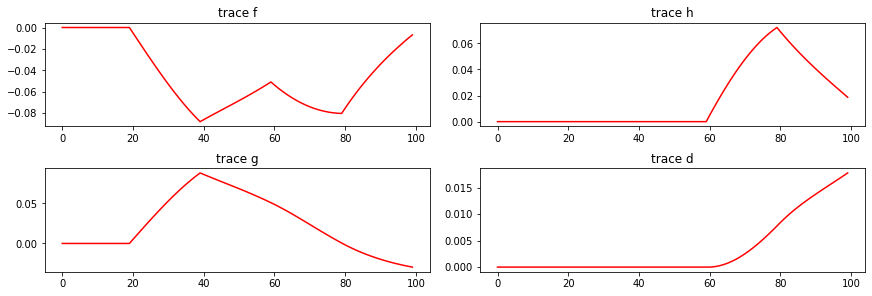

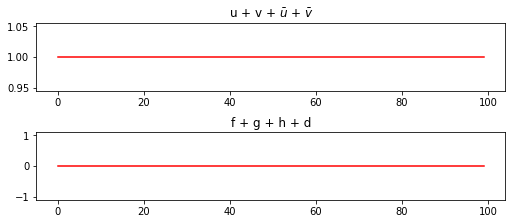

In [14]:
N, h = 100, 0.1
q = np.zeros(N)
r =  np.zeros(N)
for i in range(N//5, 2*N//5):
    q[i] = max_resistance_value
for i in range(3*N//5, 4*N//5):
    r[i] = max_resistance_value
res = solve_dir_problem(N, h, q, r)

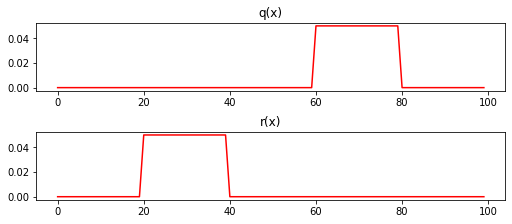

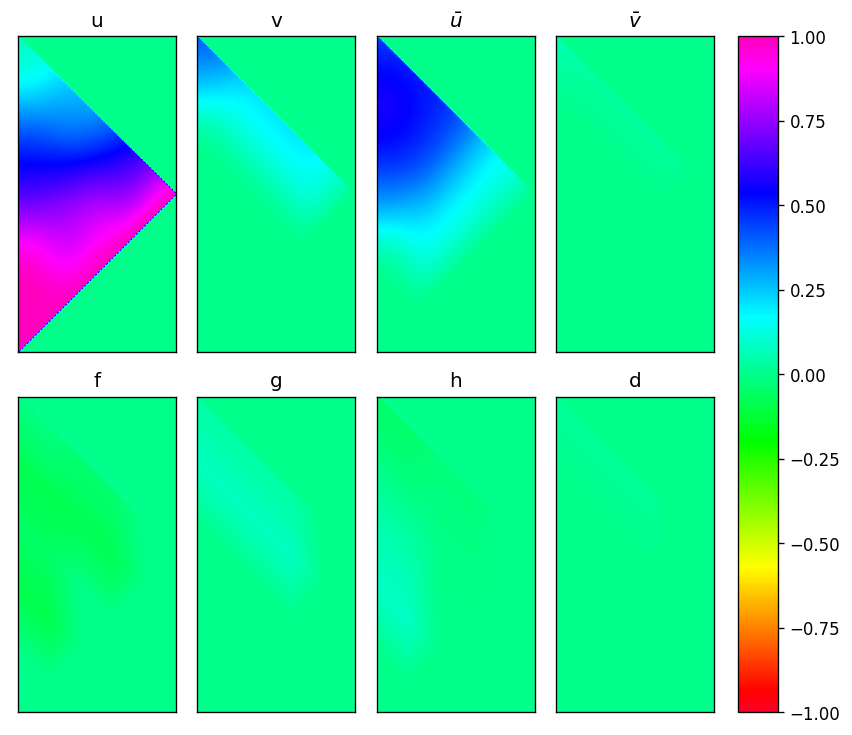

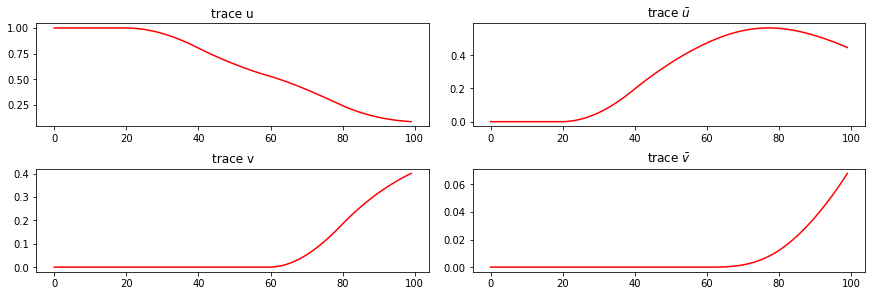

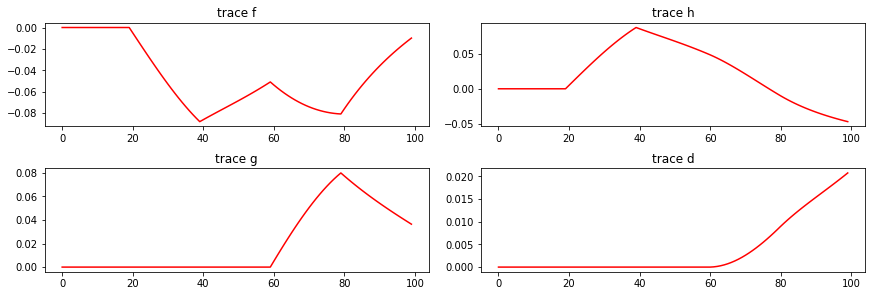

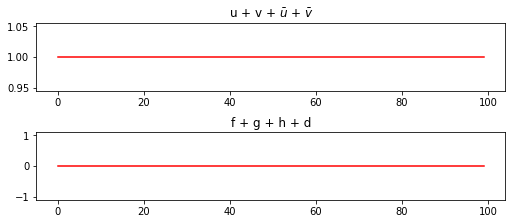

In [15]:
N, h = 100, 0.1
q = np.zeros(N)
r =  np.zeros(N)
for i in range(3*N//5, 4*N//5):
    q[i] = max_resistance_value
for i in range(N//5, 2*N//5):
    r[i] = max_resistance_value
res = solve_dir_problem(N, h, q, r)

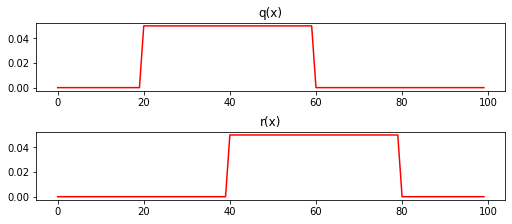

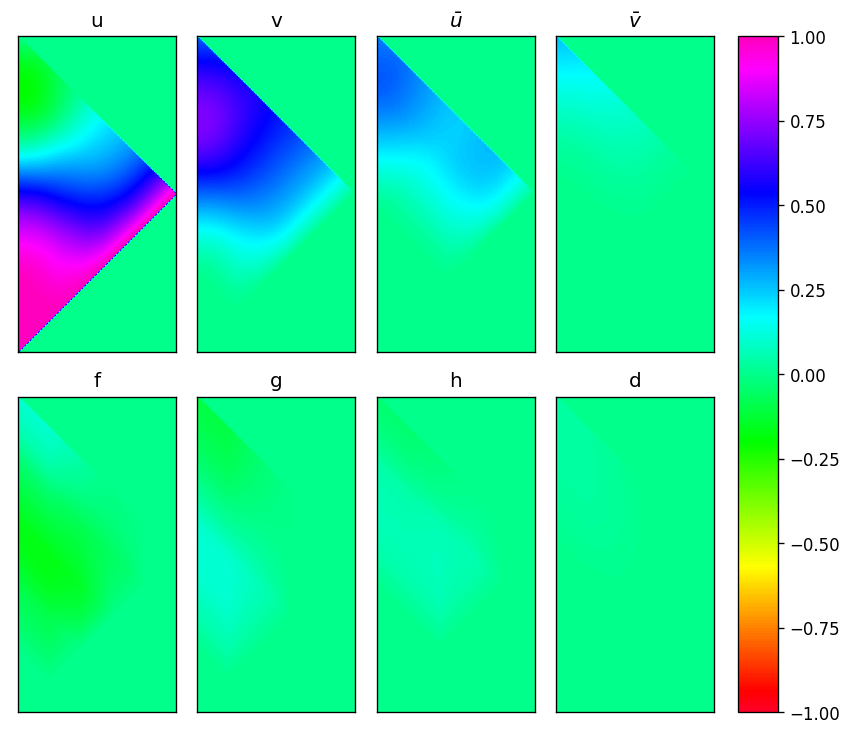

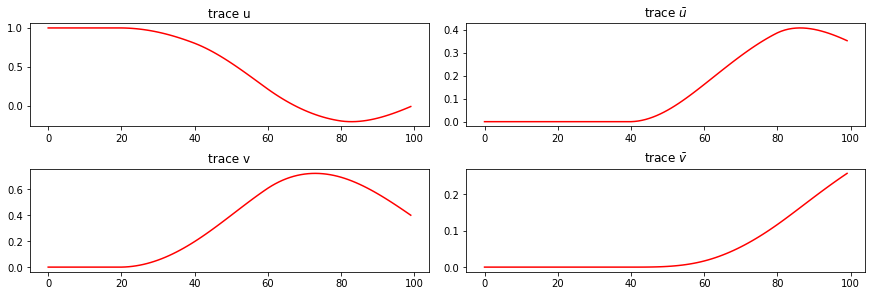

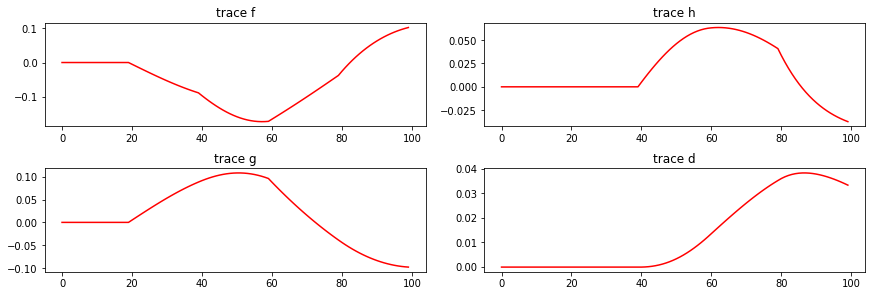

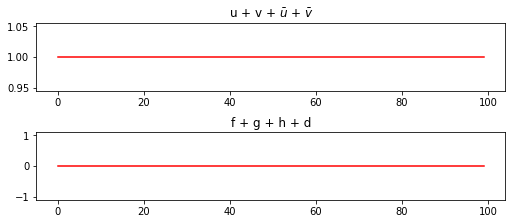

In [16]:
N, h = 100, 0.1
q = np.zeros(N)
r =  np.zeros(N)
for i in range(N//5, 3*N//5):
    q[i] = max_resistance_value
for i in range(2*N//5, 4*N//5):
    r[i] = max_resistance_value
res = solve_dir_problem(N, h, q, r)

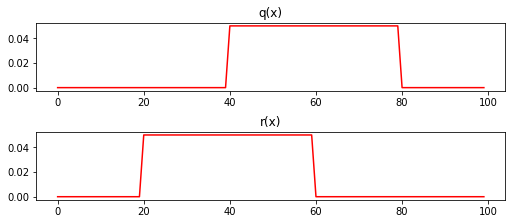

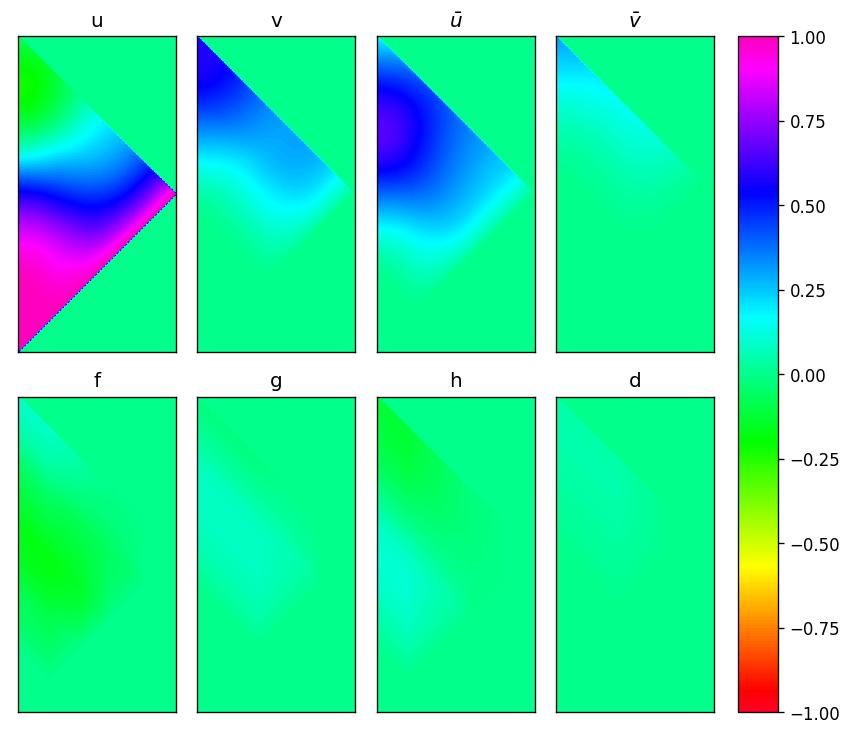

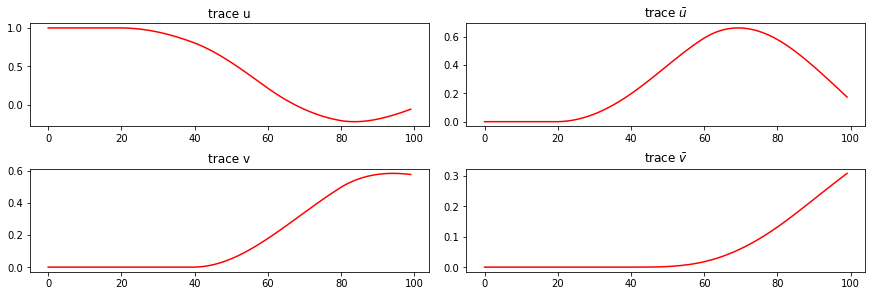

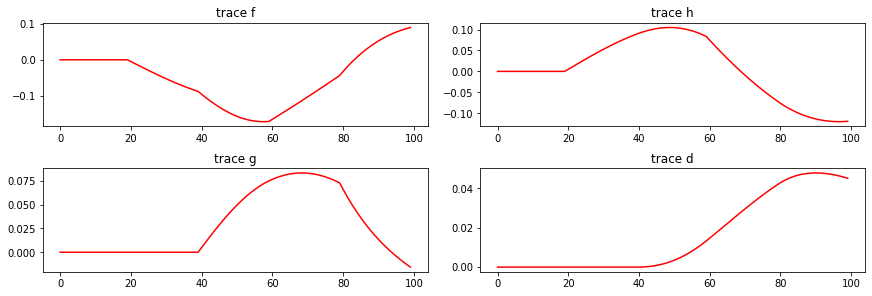

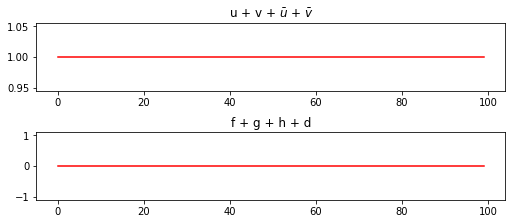

In [17]:
N, h = 100, 0.1
q = np.zeros(N)
r =  np.zeros(N)
for i in range(2*N//5, 4*N//5):
    q[i] = max_resistance_value
for i in range(N//5, 3*N//5):
    r[i] = max_resistance_value
res = solve_dir_problem(N, h, q, r)